In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data Processing
import importlib


from project_code import processing_functions as pf, visualization_functions as vf
importlib.reload(vf) 
importlib.reload(pf) 

from datetime import datetime as dt
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns



# Data Acquisition 

We collect data from two geolocations that correspond to Bordj Badji Mokhtar, Algeria, and Toronto, ON, Canada. It will be sourced through Open-Meteo's free Historical Weather API, which does not require a developer key for access.

## Selections for Data Download 

**General Details:**

- Data Source: https://open-meteo.com/en/docs/historical-weather-api

**Bordj Badji Mokhtar (BBM) Details:**

- Latitude: 21.3292
- Longitude: 0.94791 
- Timezone: We set our Virtual Private Network (VPN) to 'DZ' (Algeria) and Timezone to 'Automatically detect time zone' because Central European Time (GMT +1) or equivalent is not available as an option
- Start Date: 1994-01-01
- End Date: 2023-12-31

**Toronto Details:**

- Latitude: 43.70011  
- Longitude: -79.4163  
- Timezone: America/New_York  (shares the same timezone as Toronto)
- Start Date: 1994-01-01 
- End Date: 2023-12-31 

**Hourly Weather Variables:**
- Temperature (2 m)
- Relative Humidity (2 m)

**Additional Variables:**
- Sunshine Duration

Although Daily Weather Variables are directly available, Relative Humidity information is only available under Hourly Variables, so we procure the data at that level of granularity. Additionally, we are collecting information from 1995 onwards so that we can have a large enough dataset for deep learning purposes, but only 2002 to 2006 will be used in the current analysis.

**Settings:**

- Temperature Unit: Celsius  
- Wind Speed Unit: Km/h  
- Precipitation Unit: Millimeter  
- Timeformat: ISO 8601 (e.g. 2022-12-31)


**API Calls:**

    - https://archive-api.open-meteo.com/v1/era5?latitude=21.3292&longitude=0.94791&start_date=1994-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,sunshine_duration&timezone=auto

    - https://archive-api.open-meteo.com/v1/era5?latitude=43.70011&longitude=-79.4163&start_date=1994-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,sunshine_duration&timezone=America%2FNew_York

Per the documentation, we specify 'era5' in the API call in order to get data from the ERA5 reanalysis model, thereby ensuring data consistency and preventing the capture of unintentional alterations that may have arisen from the adoption of different weather model upgrades. 



In [2]:
# Download data from Open Meteo
file_path = '../../data/raw_data/'
file_name_bbm = 'era5_data_BordjBadjiMokhtar.json'
file_name_to = 'era5_data_Toronto.json'
api_call_bbm = 'https://archive-api.open-meteo.com/v1/era5?latitude=21.3292&longitude=0.94791&start_date=1994-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,sunshine_duration&timezone=auto'
api_call_to = 'https://archive-api.open-meteo.com/v1/era5?latitude=43.70011&longitude=-79.4163&start_date=1994-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,sunshine_duration&timezone=America%2FNew_York'

pf.download_data(api_call_bbm, file_path, file_name_bbm)
pf.download_data(api_call_to, file_path, file_name_to)

Data successfully downloaded to ../../data/raw_data/era5_data_BordjBadjiMokhtar.json.
Data successfully downloaded to ../../data/raw_data/era5_data_Toronto.json.


In [3]:
# read in data 
file_bbm = f'{file_path}{file_name_bbm}'
file_to = f'{file_path}{file_name_to}'

weather_bbm = pf.df_from_json(file_bbm)
weather_bbm.name = 'weather_bbm (Bordj Badji Mokhtar)'
weather_to = pf.df_from_json(file_to)
weather_to.name = 'weather_to (Toronto)'

pf.generate_df_summary(weather_bbm)
print('\n\n')
pf.generate_df_summary(weather_to)


Dataframe: weather_bbm (Bordj Badji Mokhtar)

------ Head: ------


,time,temperature_2m,relative_humidity_2m,sunshine_duration
0,1994-01-01T00:00,12.4,34,0.0
1,1994-01-01T01:00,11.4,36,0.0
2,1994-01-01T02:00,10.5,37,0.0
3,1994-01-01T03:00,9.7,37,0.0
4,1994-01-01T04:00,8.9,37,0.0




------ Tail: ------


,time,temperature_2m,relative_humidity_2m,sunshine_duration
262963,2023-12-31T19:00,24.4,11,0.0
262964,2023-12-31T20:00,21.5,13,0.0
262965,2023-12-31T21:00,20.4,13,0.0
262966,2023-12-31T22:00,19.3,13,0.0
262967,2023-12-31T23:00,18.0,14,0.0




------ Column Summaries: ------


,count,unique,top,freq
time,262968,262968,1994-01-01T00:00,1


,count,mean,std,min,25%,50%,75%,max
temperature_2m,262968.0,28.040200,9.081526,1.4,21.3,28.8,35.2,46.9
relative_humidity_2m,262968.0,18.812570,11.562204,2.0,11.0,16.0,24.0,99.0
sunshine_duration,262968.0,1623.146004,1761.774532,0.0,0.0,0.0,3600.0,3600.0




------ Counts: ------

Rows: 262,968
Columns: 4
Duplicate Rows = 0 | % of Total Rows = 0.0%


------ Info: ------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   time                  262968 non-null  object 
 1   temperature_2m        262968 non-null  float64
 2   relative_humidity_2m  262968 non-null  int64  
 3   sunshine_duration     262968 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.0+ MB


None



------ Missing Data Percentage: ------


time                    0.0
temperature_2m          0.0
relative_humidity_2m    0.0
sunshine_duration       0.0
dtype: float64




Dataframe: weather_to (Toronto)

------ Head: ------


,time,temperature_2m,relative_humidity_2m,sunshine_duration
0,1994-01-01T00:00,-1.5,79,0.0
1,1994-01-01T01:00,-1.3,79,0.0
2,1994-01-01T02:00,-1.2,79,0.0
3,1994-01-01T03:00,-0.8,78,0.0
4,1994-01-01T04:00,-0.8,78,0.0




------ Tail: ------


,time,temperature_2m,relative_humidity_2m,sunshine_duration
262963,2023-12-31T19:00,0.4,82,0.0
262964,2023-12-31T20:00,0.3,84,0.0
262965,2023-12-31T21:00,0.2,88,0.0
262966,2023-12-31T22:00,0.2,89,0.0
262967,2023-12-31T23:00,0.1,89,0.0




------ Column Summaries: ------


,count,unique,top,freq
time,262968,262968,1994-01-01T00:00,1


,count,mean,std,min,25%,50%,75%,max
temperature_2m,262968.0,8.473418,10.570363,-25.5,0.5,8.5,17.5,34.2
relative_humidity_2m,262968.0,71.939468,14.832891,19.0,62.0,73.0,84.0,100.0
sunshine_duration,262968.0,1239.656417,1650.560324,0.0,0.0,0.0,3600.0,3600.0




------ Counts: ------

Rows: 262,968
Columns: 4
Duplicate Rows = 0 | % of Total Rows = 0.0%


------ Info: ------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   time                  262968 non-null  object 
 1   temperature_2m        262968 non-null  float64
 2   relative_humidity_2m  262968 non-null  int64  
 3   sunshine_duration     262968 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.0+ MB


None



------ Missing Data Percentage: ------


time                    0.0
temperature_2m          0.0
relative_humidity_2m    0.0
sunshine_duration       0.0
dtype: float64

In [4]:
# rename columns 
mapper = {
    'temperature_2m' : 'temp',
    'relative_humidity_2m' : 'humidity',
}

weather_bbm.rename(columns=mapper, inplace=True)
weather_bbm['time'] = pd.to_datetime(weather_bbm['time'])

weather_to.rename(columns=mapper, inplace=True)
weather_to['time'] = pd.to_datetime(weather_to['time'])

weather_bbm_subset = weather_bbm.loc[(weather_bbm['time'].dt.year >= 2002) & (weather_bbm['time'].dt.year <= 2006)].reset_index(drop=True)
weather_to_subset = weather_to.loc[(weather_to['time'].dt.year >= 2002) & (weather_to['time'].dt.year <= 2006)].reset_index(drop=True)


In [5]:
weather_bbm_subset.head()

,time,temp,humidity,sunshine_duration
0,2002-01-01 00:00:00,15.1,21,0.0
1,2002-01-01 01:00:00,14.1,23,0.0
2,2002-01-01 02:00:00,13.1,26,0.0
3,2002-01-01 03:00:00,12.1,29,0.0
4,2002-01-01 04:00:00,11.1,32,0.0


In [6]:
# get daily aggregations 
df_daily_bbm = pf.daily_aggregations_v2(weather_bbm_subset)
df_daily_bbm['temp_range'] = df_daily_bbm['temp_max'] - df_daily_bbm['temp_min']

df_daily_to = pf.daily_aggregations_v2(weather_to_subset)
df_daily_to['temp_range'] = df_daily_to['temp_max'] - df_daily_to['temp_min']


In [7]:
print('Bordj Badji Mokhtar:\n')
display(df_daily_bbm.describe())

print('Toronto:\n')
display(df_daily_to.describe()) 

Bordj Badji Mokhtar:



,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,10.966889,19.272088,19.813308,27.991249,34.950767,15.137459
std,1.248268,9.803195,7.457630,7.532607,7.351731,2.677154
min,0.000000,4.291667,2.400000,11.012500,15.900000,4.600000
25%,10.246092,12.750000,13.525000,21.479167,28.700000,13.500000
50%,11.201583,17.104167,21.200000,29.958333,36.900000,15.300000
75%,12.000000,23.500000,26.600000,35.087500,41.500000,17.000000
max,12.084483,85.708333,32.100000,38.766667,46.000000,21.800000


Toronto:



,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,8.225841,72.724740,4.951150,8.326775,11.725465,6.774315
std,4.337435,10.450756,10.472877,10.402114,10.455243,2.772005
min,0.000000,37.708333,-24.400000,-20.158333,-16.300000,0.700000
25%,5.127224,65.250000,-2.300000,0.450000,3.225000,4.700000
50%,8.875101,72.687500,4.800000,7.902083,11.100000,6.600000
75%,11.848292,80.500000,14.475000,18.009375,21.200000,8.500000
max,14.366889,99.000000,25.800000,28.891667,32.900000,22.700000


BBM's Sunshine duration ranges between 0h and 12.0 hours, while Toronto's ranges between 0h and 14.3h.

Bordj Badji Mokhtar


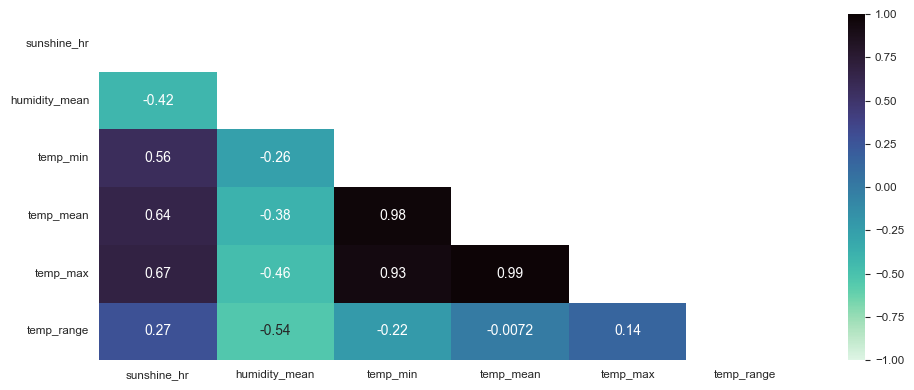

In [8]:
sns.set_style("white")
print('Bordj Badji Mokhtar')
vf.correlation_matrix(df_daily_bbm, figsize=(10,4), cmap='mako_r')

Toronto


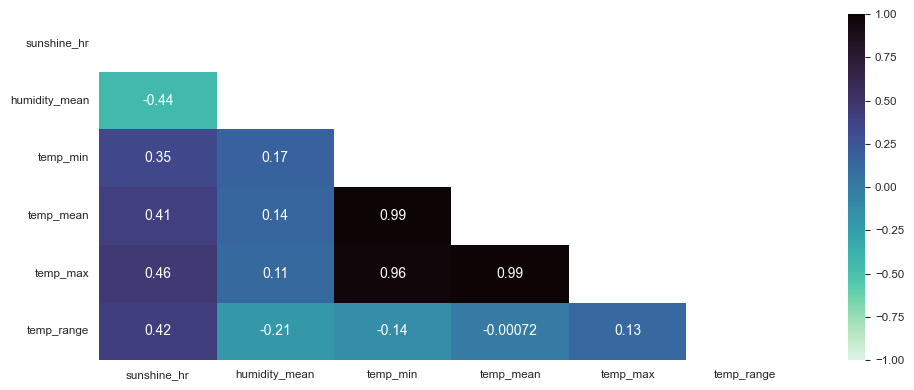

In [9]:
print('Toronto')
vf.correlation_matrix(df_daily_to, figsize=(10,4), cmap='mako_r')

Minimum, mean, and maximum temperature values have stronger correlations to sunshine duration in the case of BBM versus Toronto. Temperature range, meanwhile, has a stronger correlation in the latter case (0.42 vs. 0.27). Mean relative humidity has about the same strength of association in both cases (-0.42 for BBM vs -0.44 for Toronto). 

Bordj Badji Mokhtar



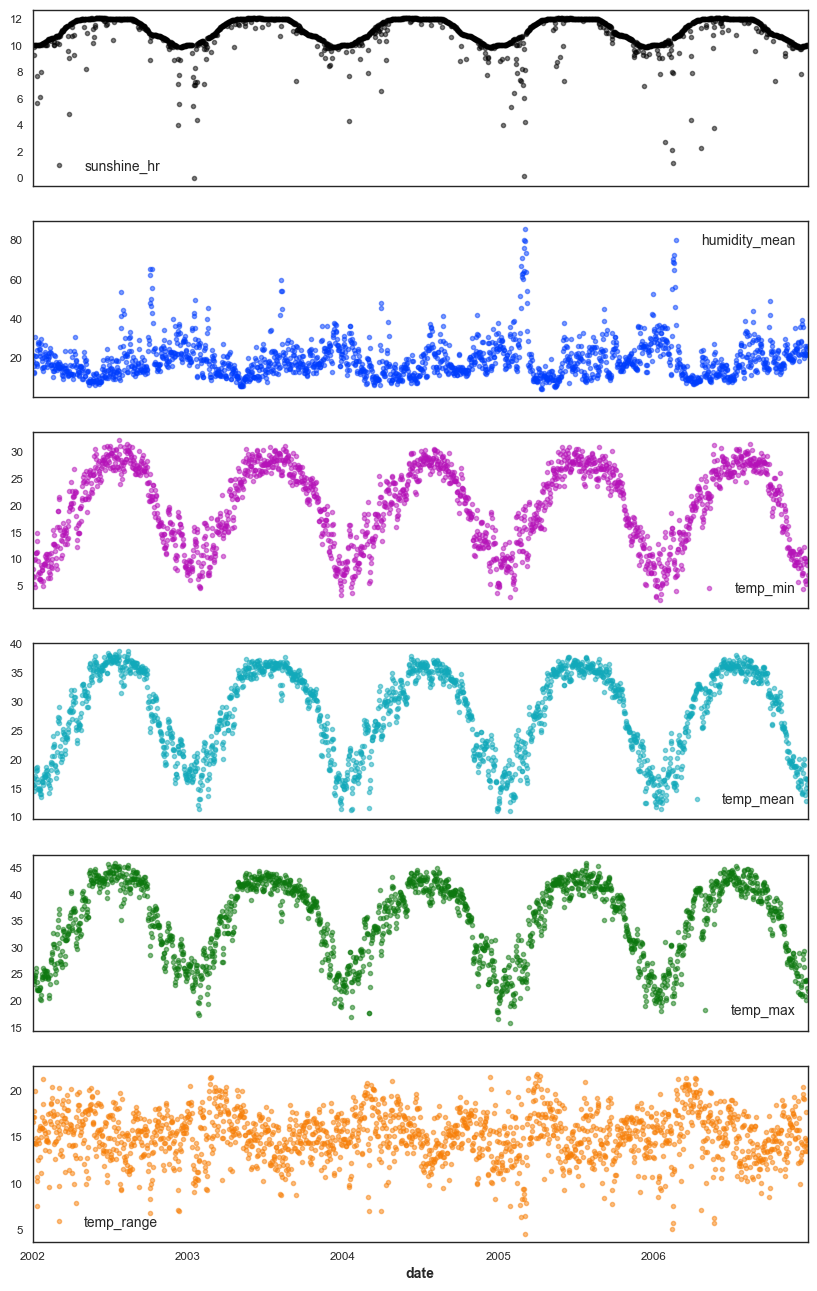

Toronto



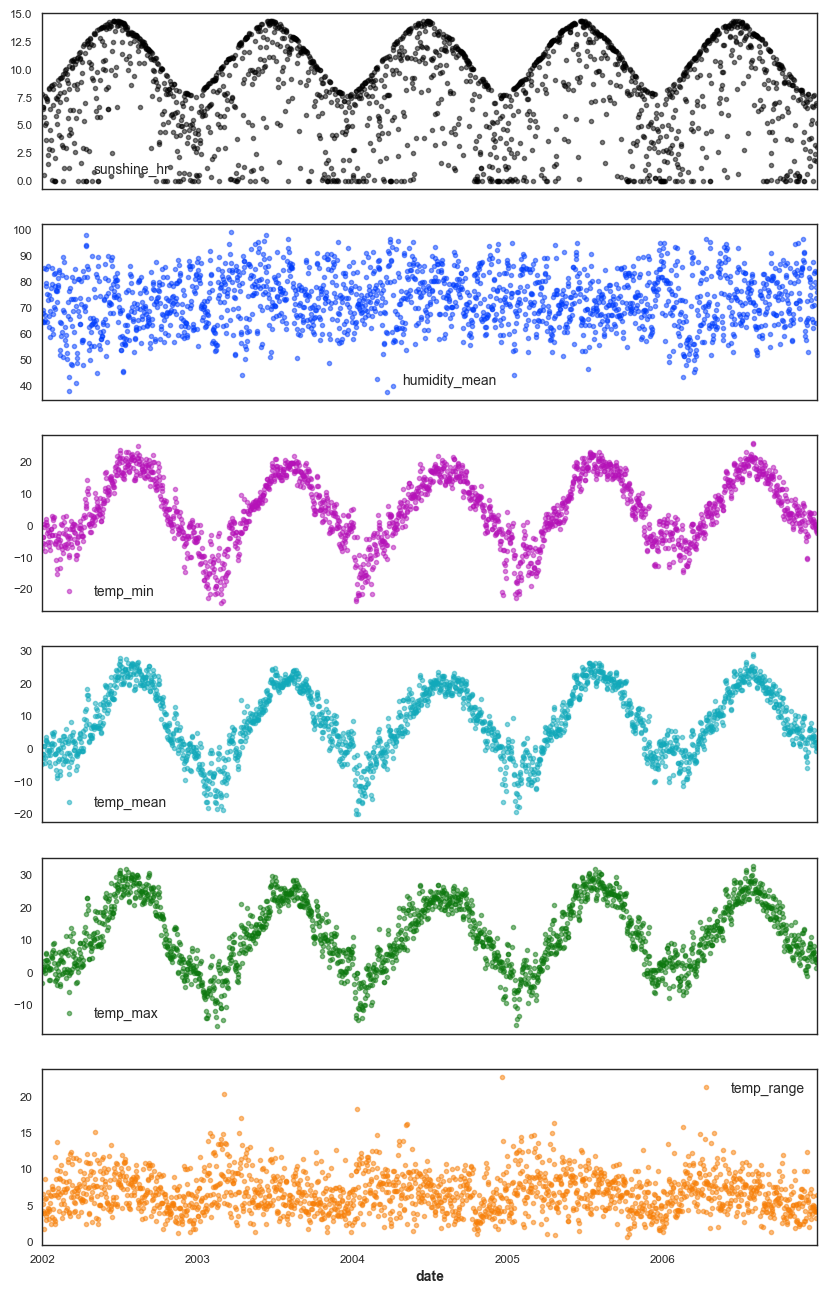

In [10]:
# sns.set_style("whitegrid", {'grid.linestyle': ':'})

print('Bordj Badji Mokhtar\n')

df_daily_bbm.plot(marker='.', alpha=0.5,
                                               linestyle='None',
                                                figsize=(10, 16),
                                                subplots=True)
plt.show()

print('Toronto\n')

df_daily_to.plot(marker='.', alpha=0.5,
                                               linestyle='None',
                                                figsize=(10, 16),
                                                subplots=True)
plt.show()

Let us zero in on Sunshine Duration via decomposition.

Bordj Badji Mokhtar:

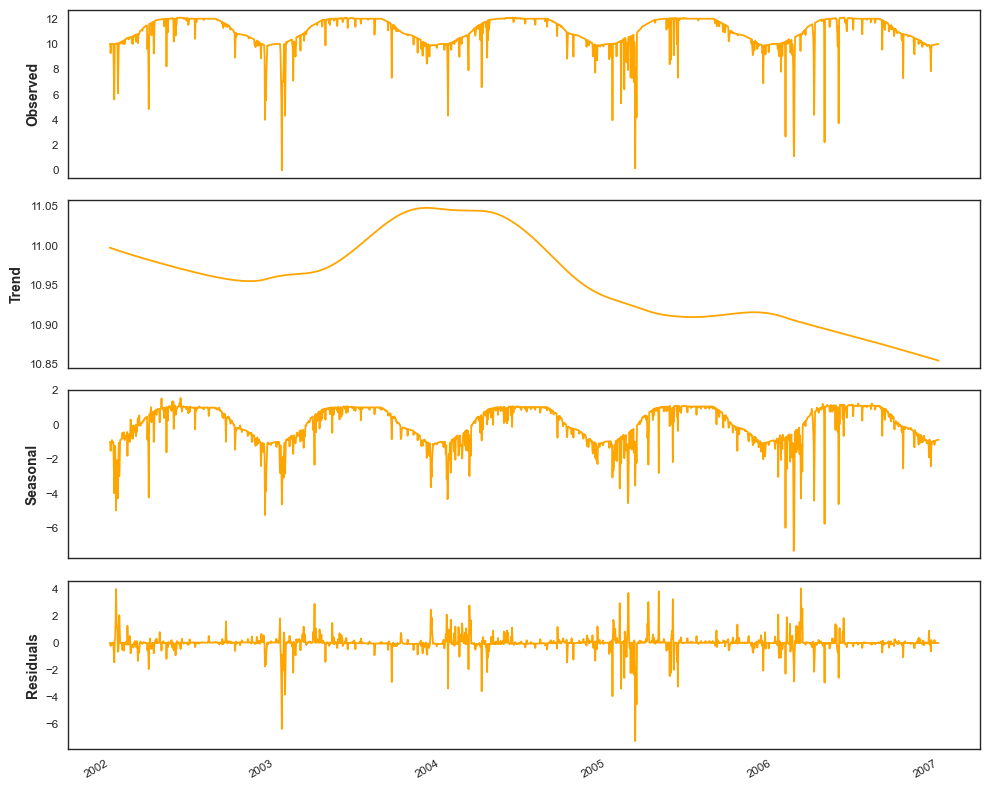

In [11]:
vf.plot_seasonal_decomposition(df_daily_bbm, 'sunshine_hr', period=365, color='orange')

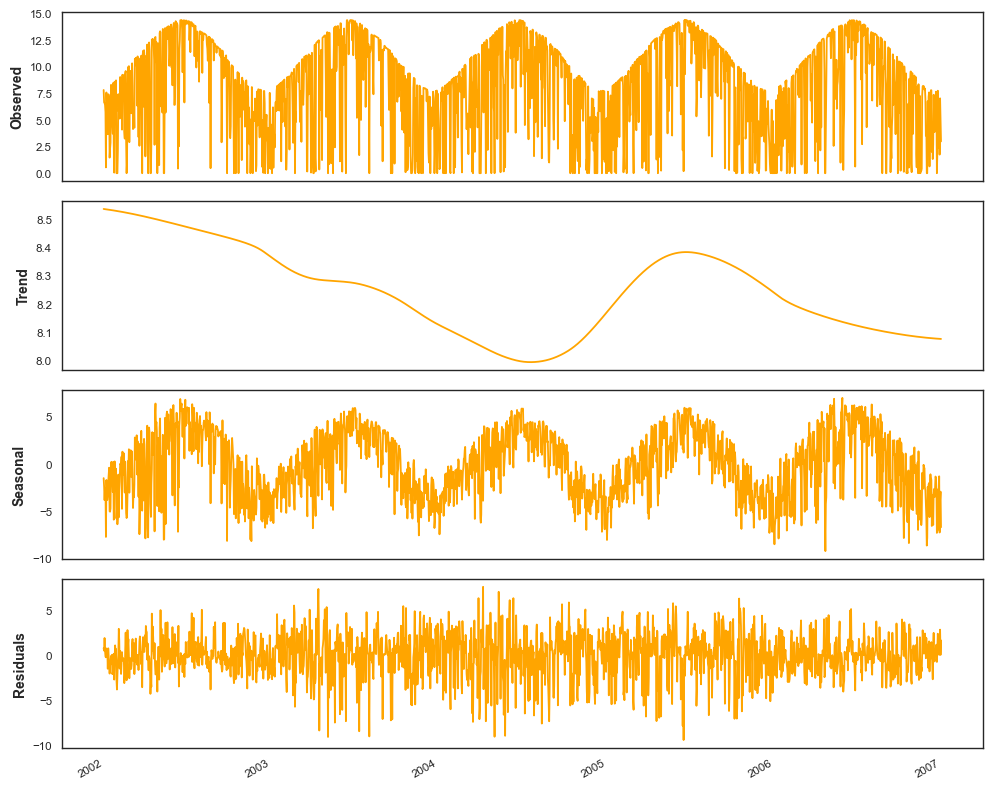

In [12]:
vf.plot_seasonal_decomposition(df_daily_to, 'sunshine_hr', period=365, color='orange')

There is a lot more noise and variation within the Toronto data vs. BBM. There is clear annual seasonality in both cases, albeit more pronounced in the former. 

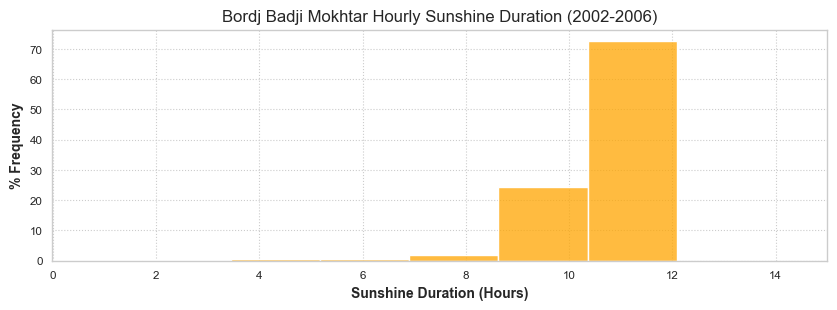

In [13]:
sns.set_style("whitegrid", {'grid.linestyle': ':'})
plt.figure(figsize=(10,3))
sns.histplot(df_daily_bbm, x='sunshine_hr', bins=7, color='orange',
            stat='percent')
plt.title('Bordj Badji Mokhtar Hourly Sunshine Duration (2002-2006)')
plt.xlabel('Sunshine Duration (Hours)')
plt.ylabel('% Frequency')
plt.xlim(-0.01, 15)
plt.grid(True)
plt.savefig('hourly_sunshine_duration.png')
plt.show()

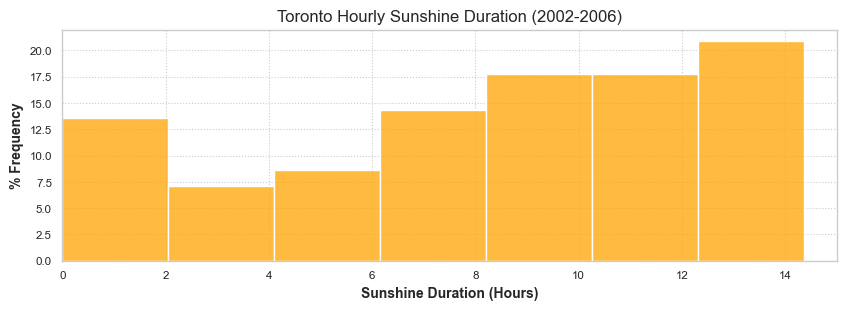

In [14]:
# sns.set_style("whitegrid", {'grid.linestyle': ':'})
plt.figure(figsize=(10,3))
sns.histplot(df_daily_to, x='sunshine_hr', bins=7, color='orange',
            stat='percent')
plt.title('Toronto Hourly Sunshine Duration (2002-2006)')
plt.xlabel('Sunshine Duration (Hours)')
plt.ylabel('% Frequency')
plt.xlim(-0.01, 15)
plt.grid(True)
plt.savefig('hourly_sunshine_duration.png')
plt.show()

For the next part of the analysis, we will create some time-based variables.

In [15]:
for df_daily in [df_daily_bbm, df_daily_to]:
    df_daily['year'] = df_daily.index.year
    df_daily['month'] = df_daily.index.month
#     df_daily['day_of_year'] = df_daily.index.day_of_year

month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

month_label_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
               'Sep', 'Oct', 'Nov', 'Dec']


Bordj Badji Mokhtar:



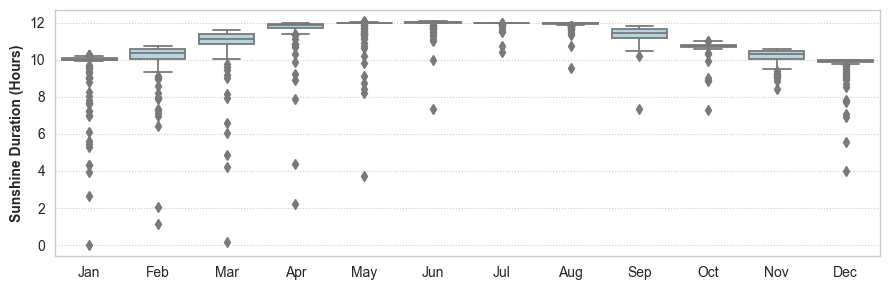

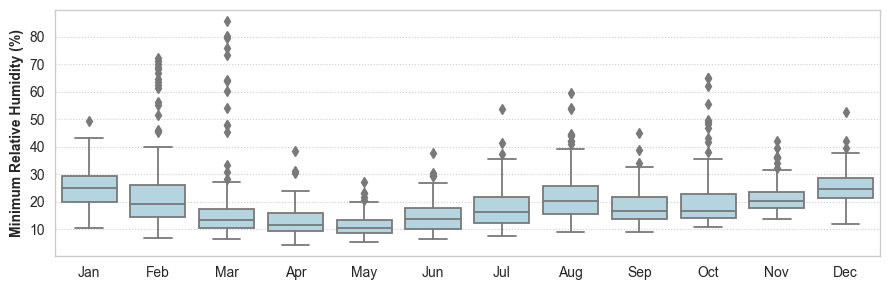

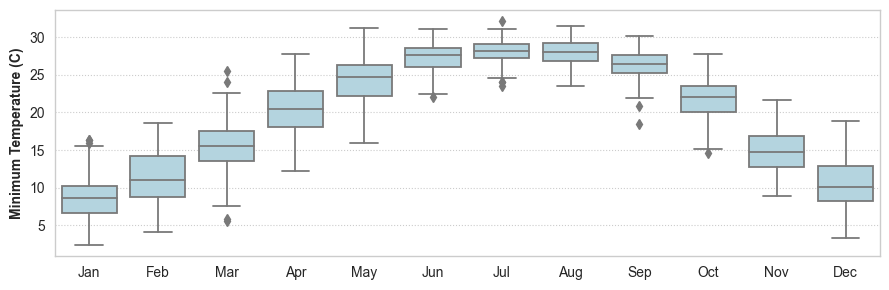

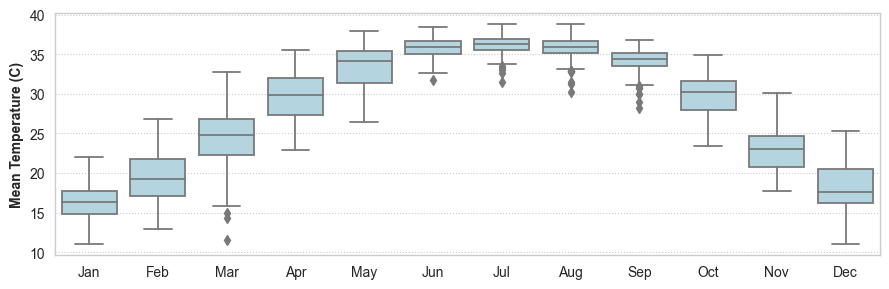

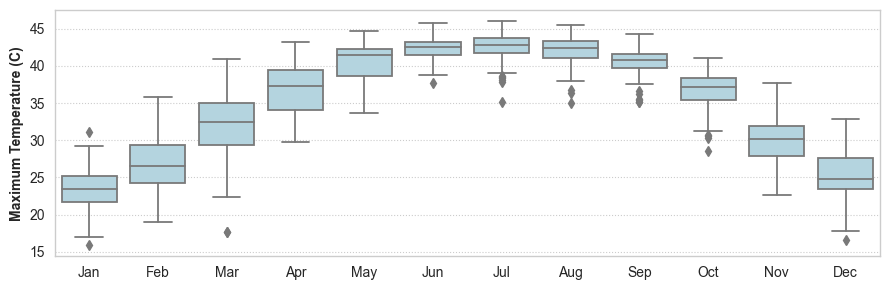



Toronto:



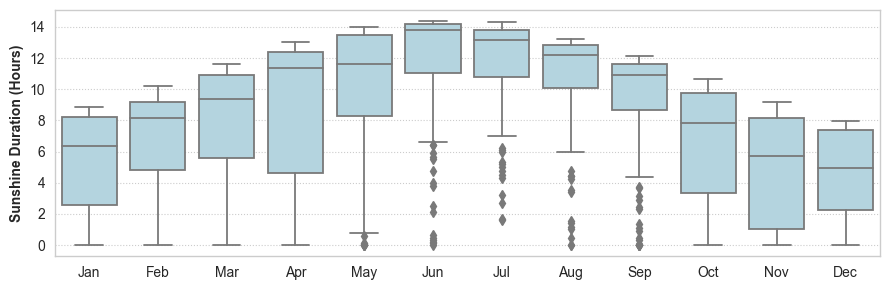

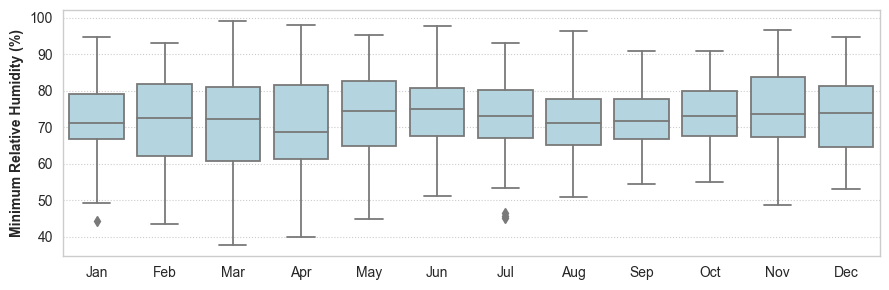

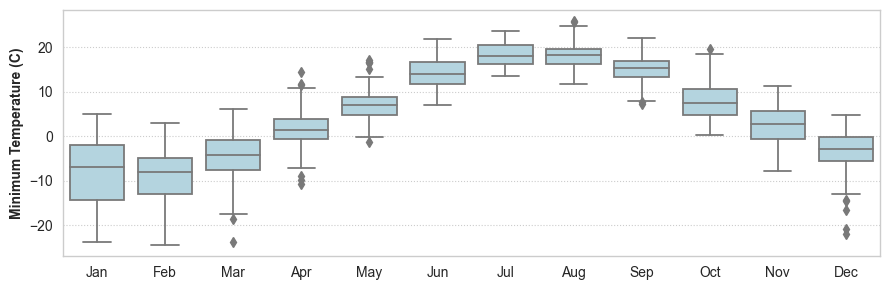

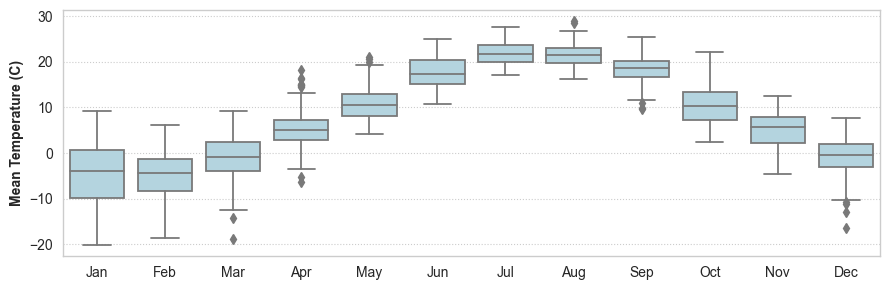

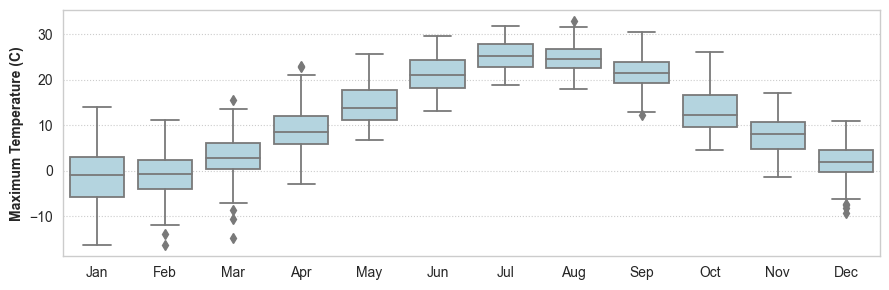

In [16]:
y_labels = {
    'sunshine_hr': 'Sunshine Duration (Hours)',
    'temp_min': 'Minimum Temperature (C)', 
    'temp_mean': 'Mean Temperature (C)',
    'temp_max': 'Maximum Temperature (C)', 
    'temp_range': 'Temperature Range (C)',
    'humidity_mean': 'Minimum Relative Humidity (%)',
}

cols_to_plot = df_daily_bbm.columns[:-3]

importlib.reload(vf) 
importlib.reload(pf) 
print('Bordj Badji Mokhtar:\n')
vf.generate_boxplots(data=df_daily_bbm, columns=cols_to_plot, granularity='month',
                     alternate_x_labels=month_label_abbr, y_labels=y_labels,
                    figsize=(9,3), label_font_size=10, tick_font_size=10)

print('\n\nToronto:\n')
vf.generate_boxplots(data=df_daily_to, columns=cols_to_plot, granularity='month',
                     alternate_x_labels=month_label_abbr, y_labels=y_labels,
                    figsize=(9,3), label_font_size=10, tick_font_size=10)

Rather than looking at global outliers, we first assess them using a monthly lens. Although we will ultimately complete the experiments leaving them intact (to follow the lead of El-Kenawy et al, as well as to assess the models' robustness to outliers), for now we adjust the outlier values in each column by capping them at +/- 1.5 * IQR (i.e. the limits beyond which a data point is generally considered to be an outlier). 

In [17]:
print('Bordj Badji Mokhtar:\n')
df_clean_bbm = pf.adjust_outliers(df_daily_bbm, columns=cols_to_plot, granularity='month')

print('\n\nToronto:\n')
df_clean_to = pf.adjust_outliers(df_daily_to, columns=cols_to_plot, granularity='month')

Bordj Badji Mokhtar:

Total outliers adjusted in the sunshine_hr column: 227
Percent of total rows: 12.43%


Total outliers adjusted in the humidity_mean column: 82
Percent of total rows: 4.49%


Total outliers adjusted in the temp_min column: 15
Percent of total rows: 0.82%


Total outliers adjusted in the temp_mean column: 23
Percent of total rows: 1.26%


Total outliers adjusted in the temp_max column: 25
Percent of total rows: 1.37%




Toronto:

Total outliers adjusted in the sunshine_hr column: 68
Percent of total rows: 3.72%


Total outliers adjusted in the humidity_mean column: 4
Percent of total rows: 0.22%


Total outliers adjusted in the temp_min column: 24
Percent of total rows: 1.31%


Total outliers adjusted in the temp_mean column: 24
Percent of total rows: 1.31%


Total outliers adjusted in the temp_max column: 14
Percent of total rows: 0.77%




Bordj Badji Mokhtar:



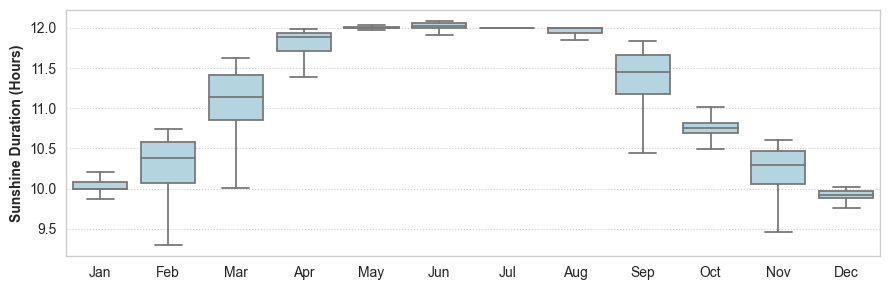

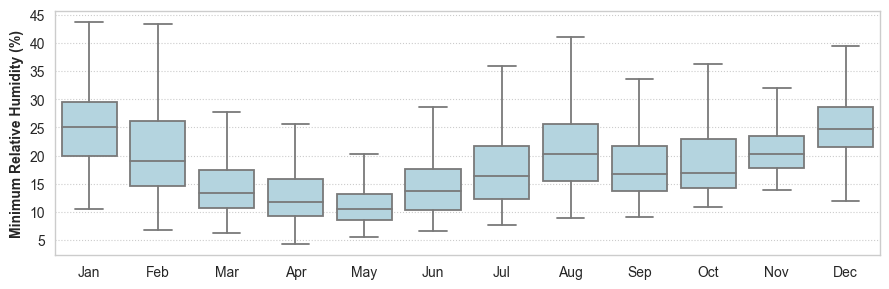

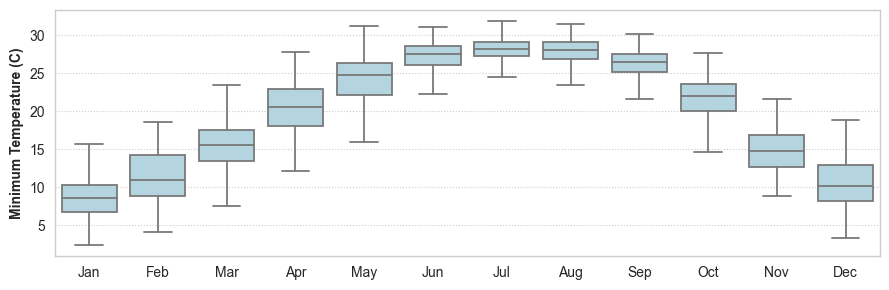

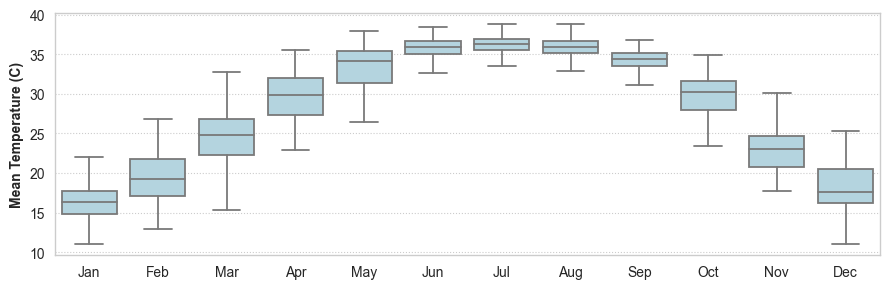

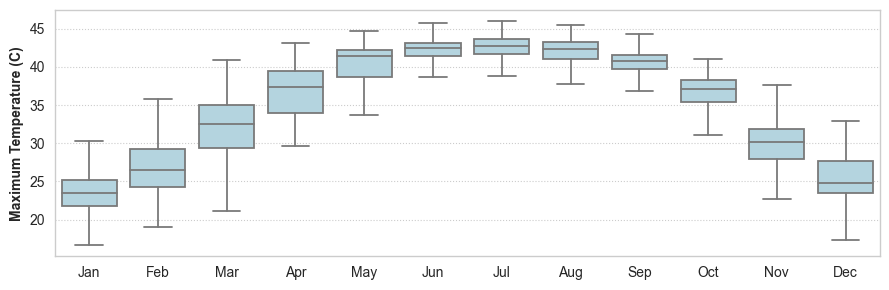



Toronto:



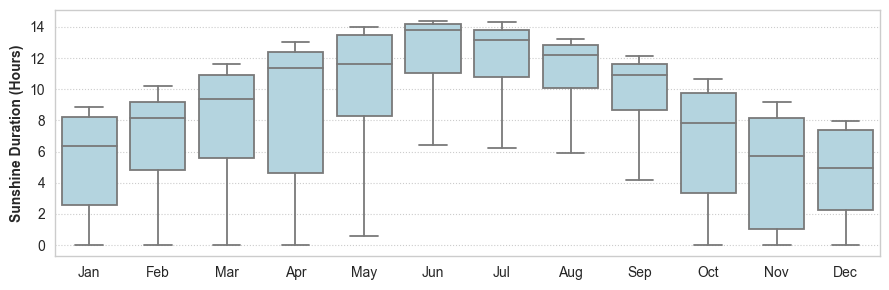

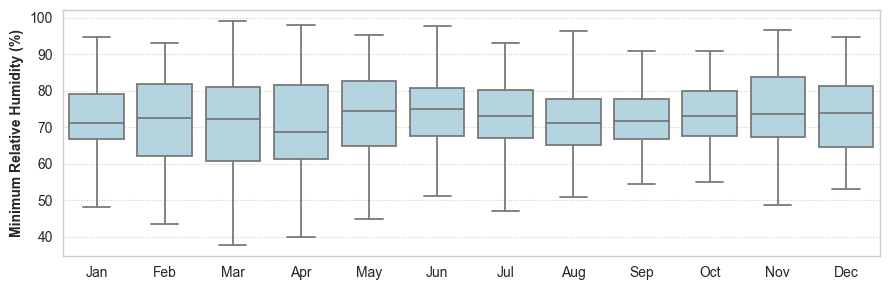

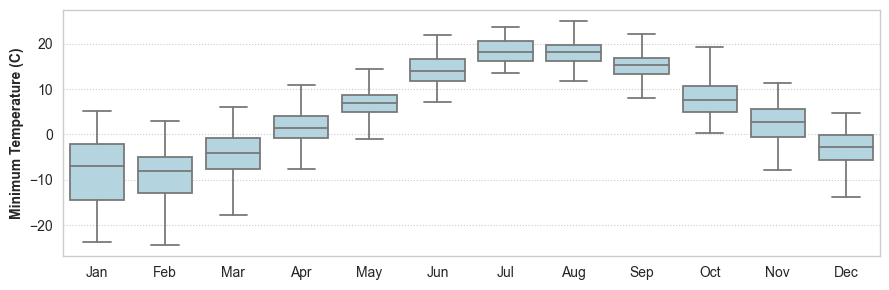

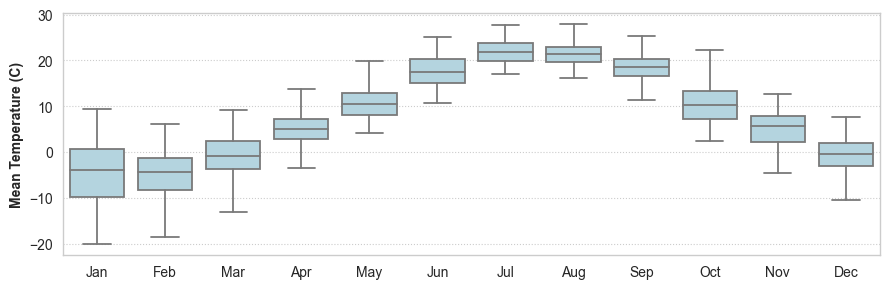

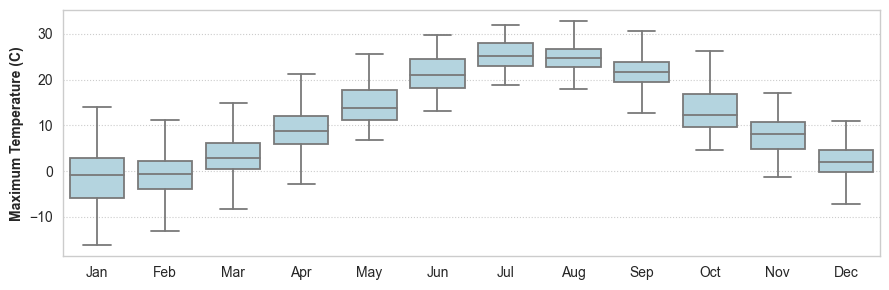

In [18]:
print('Bordj Badji Mokhtar:\n')
vf.generate_boxplots(data=df_clean_bbm, columns=cols_to_plot, granularity='month',
                     alternate_x_labels=month_label_abbr, y_labels=y_labels,
                    figsize=(9,3), label_font_size=10, tick_font_size=10)

print('\n\nToronto:\n')
vf.generate_boxplots(data=df_clean_to, columns=cols_to_plot, granularity='month',
                     alternate_x_labels=month_label_abbr, y_labels=y_labels,
                    figsize=(9,3), label_font_size=10, tick_font_size=10)

In [19]:
df_clean_bbm.drop(['year', 'month'], axis=1, inplace=True)
df_clean_to.drop(['year', 'month'], axis=1, inplace=True)

df_daily_bbm.drop(['year', 'month'], axis=1, inplace=True)
df_daily_to.drop(['year', 'month'], axis=1, inplace=True)

print('Bordj Badji Mokhtar:\n')
display(df_clean_bbm.describe())

print('Toronto:\n')
display(df_clean_to.describe()) 

Bordj Badji Mokhtar:



,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,11.122673,18.664670,19.816190,28.004245,34.968168,15.137459
std,0.848900,7.811861,7.454255,7.531770,7.343353,2.677154
min,9.295532,4.291667,2.400000,11.012500,16.650000,4.600000
25%,10.309431,12.750000,13.525000,21.479167,28.700000,13.500000
50%,11.331722,17.104167,21.200000,30.025000,36.900000,15.300000
75%,12.000000,23.500000,26.600000,35.087500,41.500000,17.000000
max,12.084483,43.687500,31.825000,38.766667,46.000000,21.800000


Toronto:



,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,8.325474,72.728836,4.961213,8.329851,11.732092,6.774315
std,4.224756,10.440359,10.427141,10.371591,10.433801,2.772005
min,0.000000,37.708333,-24.400000,-20.158333,-16.200000,0.700000
25%,5.692690,65.250000,-2.300000,0.450000,3.225000,4.700000
50%,8.875101,72.687500,4.800000,7.902083,11.100000,6.600000
75%,11.848292,80.500000,14.456250,17.992708,21.187500,8.500000
max,14.366889,99.000000,24.975000,27.987500,32.775000,22.700000


# Experiments

In [20]:
import warnings
warnings.filterwarnings(
    "ignore"
)

import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import logging
logging.disable(logging.CRITICAL)


# data processing
from darts import concatenate
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
import datetime
import importlib
import numpy as np
import pandas as pd
import random
# import requests
from sklearn.preprocessing import MinMaxScaler
import sys
import time

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from darts.models import RandomForest
from darts.utils.callbacks import TFMProgressBar
from darts.utils.utils import SeasonalityMode

# metrics
from darts.metrics import mae, r2_score, rmse

## Random Forest Test 

### Bordj Badji Mokhtar

#### Experiment with unadjusted dataset (w/ outliers)

In El-kenawy et al., the SD values were scaled using min-max method, and all the reported SD values and associated RMSE and MSE values were therefore dimensionless. We start with reviewing the results for the normalized values. 

In [21]:
# BBM results in El-kenawy et al study
comparison_rmse = 0.2164
comparison_mae = 0.1633

In [22]:
# importlib.reload(pf) 
target_bbm = pf.create_timeseries(df_daily_bbm, 'sunshine_hr')

# create stacked timeseries for past covariates
past_covariates_bbm = pf.get_covariate_ts(df_daily_bbm)

# create training, testing, and validation datasets

# training_cutoff = pd.Timestamp(year=2006, month=12, day=1)
# validation_cutoff = pd.Timestamp(year=2006, month=11, day=2)

# the following equates to an 60%-20%-20% train-validation-test split
target_train_bbm, target_test_bbm = target_bbm.split_after(.8) 
target_train_bbm, target_val_bbm = target_train_bbm.split_after(0.75) 

target_scaler_bbm = Scaler()
target_train_trsf_bbm = target_scaler_bbm.fit_transform(target_train_bbm)
target_val_trf_bbm = target_scaler_bbm.transform(target_val_bbm)

covariates_train_bbm, _ = past_covariates_bbm.split_before(.8)

# No need to split the covariates into train/val/test, as Darts will line up the time indices
# as appropriate 
covariate_scaler_bbm = Scaler()
covariate_scaler_bbm.fit(covariates_train_bbm)
past_covariates_trf_bbm = covariate_scaler_bbm.transform(past_covariates_bbm)


In [23]:
len_df = len(df_daily_bbm)

print(f'Training Data: {len(target_train_bbm)/len_df:.1%} of total dataset')
print(f'Validation Data: {len(target_val_bbm)/len_df:.1%} of total dataset')
print(f'Test Data: {len(target_test_bbm)/len_df:.1%} of total dataset')

Training Data: 60.0% of total dataset
Validation Data: 20.0% of total dataset
Test Data: 20.0% of total dataset


In [24]:
# grid search 

np.random.seed(0)

test_size = int(.2 * len_df) # 20% of the data
parameters_rf = {
            'lags': [1, 3, 5, 7], 
            'lags_past_covariates': [1, 3, 5, 7],
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [2, 3, 5, 8],
            'output_chunk_length': [test_size]
        }

start_time = time.perf_counter() 
model_bbm, best_parameters_bbm, rmse_score_bbm = RandomForest.gridsearch(
                parameters=parameters_rf, 
                series=target_train_trsf_bbm, 
                past_covariates=past_covariates_trf_bbm , 
                val_series=target_val_trf_bbm, 
                use_fitted_values=False, 
                metric=rmse
            )

end_time = time.perf_counter() 
total_grid_search_time = (end_time - start_time) / 60

print(f'Completed grid search in {total_grid_search_time:.2f} minutes.')


Completed grid search in 12.31 minutes.


In [25]:
print(f'Best Model Parameters: {best_parameters_bbm}')
print(f'RMSE: {rmse_score_bbm:.4f}')

Best Model Parameters: {'lags': 1, 'lags_past_covariates': 7, 'n_estimators': 50, 'max_depth': 5, 'output_chunk_length': 365}
RMSE: 0.0847


The grid search returns the following: 1) a tuple containing an *untrained* model_class instance created from the best-performing hyper-parameters; 2) a dictionary containing these best hyper-parameters; and 3)the metric score for the best hyper-parameters.

In [26]:
# testing 

target_train_bbm, target_test_bbm = target_bbm.split_after(0.8)
covariates_train_bbm, covariates_test_bbm = past_covariates_bbm.split_after(0.8)

target_scaler_bbm = Scaler()
target_train_trsf_bbm = target_scaler_bbm.fit_transform(target_train_bbm)
target_test_trsf_bbm = target_scaler_bbm.transform(target_test_bbm)

covariate_scaler_bbm = Scaler()
covariate_scaler_bbm.fit(covariates_train_bbm)
past_covariates_trf_bbm = covariate_scaler_bbm.transform(past_covariates_bbm)

# use the unfitted model that was returned by the grid search
model_bbm.fit(
    series=target_train_trsf_bbm,
    past_covariates=past_covariates_trf_bbm
)

num_predictions = len(target_test_bbm)

y_pred = model_bbm.predict(num_predictions)
rmse_bbm = rmse(y_pred, target_test_trsf_bbm[:num_predictions])
mae_bbm = mae(y_pred, target_test_trsf_bbm[:num_predictions])


In [27]:
print(f"RMSE score of {rmse_bbm:.4f} vs. El-kenawy et al.'s reported {comparison_rmse} RMSE.")
print(f"MAE score of {mae_bbm:.4f} vs. El-kenawy et al.'s reported {comparison_mae} MAE.")

RMSE score of 0.0976 vs. El-kenawy et al.'s reported 0.2164 RMSE.
MAE score of 0.0331 vs. El-kenawy et al.'s reported 0.1633 MAE.


We follow up with a test w/ non-normalized target data to compare results:

In [28]:
target_train_bbm, _ = target_bbm.split_after(.8) 
target_train_bbm, target_val_bbm = target_train_bbm.split_after(0.75) 
covariates_train_bbm, _ = past_covariates_bbm.split_before(.8)

covariate_scaler_bbm = Scaler()
covariate_scaler_bbm.fit(covariates_train_bbm)
past_covariates_trf_bbm = covariate_scaler_bbm.transform(past_covariates_bbm)


In [29]:
# grid search 

np.random.seed(0)

parameters_rf = {
            'lags': [1, 3, 5, 7], 
            'lags_past_covariates': [1, 3, 5, 7],
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [2, 3, 5, 8],
            'output_chunk_length': [test_size]
        }

start_time = time.perf_counter() 
model_bbm2, best_parameters_bbm2, rmse_score_bbm2 = RandomForest.gridsearch(
                parameters=parameters_rf, 
                series=target_train_bbm, 
                past_covariates=past_covariates_trf_bbm, 
                val_series=target_val_bbm, 
                use_fitted_values=False, 
                metric=rmse
            )

end_time = time.perf_counter() 
total_grid_search_time = (end_time - start_time) / 60

print(f'Completed grid search in {total_grid_search_time:.2f} minutes.')


Completed grid search in 12.32 minutes.


In [30]:
print(f'Best Model Parameters: {best_parameters_bbm2}')
print(f'RMSE: {rmse_score_bbm2:.4f}')

Best Model Parameters: {'lags': 1, 'lags_past_covariates': 7, 'n_estimators': 50, 'max_depth': 5, 'output_chunk_length': 365}
RMSE: 1.0238


In [31]:
# testing 
target_train_bbm, target_test_bbm = target_bbm.split_after(0.8)
covariates_train_bbm, _ = past_covariates_bbm.split_after(0.8)

covariate_scaler_bbm = Scaler()
covariate_scaler_bbm.fit(covariates_train_bbm)
past_covariates_trf_bbm = covariate_scaler_bbm.transform(past_covariates_bbm)

# use the unfitted model that was returned by the grid search
model_bbm2.fit(
    series=target_train_bbm,
    past_covariates=past_covariates_trf_bbm
)

y_pred2 = model_bbm2.predict(num_predictions)
rmse_bbm2 = rmse(y_pred2, target_test_bbm[:num_predictions])
mae_bbm2 = mae(y_pred2, target_test_bbm[:num_predictions])


In [32]:
print(f"RMSE score of {rmse_bbm2:.4f} vs. El-kenawy et al.'s reported {comparison_rmse} RMSE.")
print(f"MAE score of {mae_bbm2:.4f} vs. El-kenawy et al.'s reported {comparison_mae} MAE.")

RMSE score of 1.1789 vs. El-kenawy et al.'s reported 0.2164 RMSE.
MAE score of 0.4000 vs. El-kenawy et al.'s reported 0.1633 MAE.


Our mini experiment yielded lower RMSE and MSE values than in the El-kenawy study for the normalized data. However, we can see from the results with unscaled data that there is a risk of overstating model performance with so-called dimensionless targets and errors. At the end of the day, predictions will be made in regular hourly units, so it's important to assess from that basis. We do note that the authors converted 

We now repeat the experiment using the Toronto data. 

### Toronto

In [33]:
target_to = pf.create_timeseries(df_daily_to, 'sunshine_hr')

# create stacked timeseries for past covariates
past_covariates_to = pf.get_covariate_ts(df_daily_to)

# create training, testing, and validation datasets

# the following equates to an 60%-20%-20% train-validation-test split
target_train_to, target_test_to = target_to.split_after(.8) 
target_train_to, target_val_to = target_train_to.split_after(0.75) 

target_scaler_to = Scaler()
target_train_trsf_to = target_scaler_to.fit_transform(target_train_to)
target_val_trf_to = target_scaler_to.transform(target_val_to)

covariates_train_to, _ = past_covariates_to.split_before(.8)

# No need to split the covariates into train/val/test, as Darts will line up the time indices
# as appropriate 
covariate_scaler_to = Scaler()
covariate_scaler_to.fit(covariates_train_to)
past_covariates_trf_to = covariate_scaler_to.transform(past_covariates_to)


In [34]:
# grid search 

np.random.seed(0)

test_size = int(.2 * len_df) # 20% of the data
parameters_rf = {
            'lags': [1, 3, 5, 7], 
            'lags_past_covariates': [1, 3, 5, 7],
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [2, 3, 5, 8],
            'output_chunk_length': [test_size]
        }

start_time = time.perf_counter() 
model_to, best_parameters_to, rmse_score_to = RandomForest.gridsearch(
                parameters=parameters_rf, 
                series=target_train_trsf_to, 
                past_covariates=past_covariates_trf_to , 
                val_series=target_val_trf_to, 
                use_fitted_values=False, 
                metric=rmse
            )

end_time = time.perf_counter() 
total_grid_search_time = (end_time - start_time) / 60

print(f'Completed grid search in {total_grid_search_time:.2f} minutes.')


Completed grid search in 13.15 minutes.


In [35]:
print(f'Best Model Parameters: {best_parameters_to}')
print(f'RMSE: {rmse_score_to:.4f}')

Best Model Parameters: {'lags': 5, 'lags_past_covariates': 5, 'n_estimators': 50, 'max_depth': 5, 'output_chunk_length': 365}
RMSE: 0.2422


In [36]:
# testing 

target_train_to, target_test_to = target_to.split_after(0.8)
covariates_train_to, covariates_test_to = past_covariates_to.split_after(0.8)

target_scaler_to = Scaler()
target_train_trsf_to = target_scaler_to.fit_transform(target_train_to)
target_test_trsf_to = target_scaler_to.transform(target_test_to)

covariate_scaler_to = Scaler()
covariate_scaler_to.fit(covariates_train_to)
past_covariates_trf_to = covariate_scaler_to.transform(past_covariates_to)

# use the unfitted model that was returned by the grid search
model_to.fit(
    series=target_train_trsf_to,
    past_covariates=past_covariates_trf_to
)

num_predictions = len(target_test_to)

y_pred = model_to.predict(num_predictions)
rmse_to = rmse(y_pred, target_test_trsf_to[:num_predictions])
mae_to = mae(y_pred, target_test_trsf_to[:num_predictions])


In [37]:
print(f"RMSE score of {rmse_to:.4f} vs. El-kenawy et al.'s reported {comparison_rmse} RMSE.")
print(f"MAE score of {mae_to:.4f} vs. El-kenawy et al.'s reported {comparison_mae} MAE.")

RMSE score of 0.2513 vs. El-kenawy et al.'s reported 0.2164 RMSE.
MAE score of 0.2121 vs. El-kenawy et al.'s reported 0.1633 MAE.


We again follow up with a test w/ unscaled target data to compare results:

In [38]:
target_train_to, _ = target_to.split_after(.8) 
target_train_to, target_val_to = target_train_to.split_after(0.75) 
covariates_train_to, _ = past_covariates_to.split_before(.8)

covariate_scaler_to = Scaler()
covariate_scaler_to.fit(covariates_train_to)
past_covariates_trf_to = covariate_scaler_to.transform(past_covariates_to)

# grid search 

np.random.seed(0)

parameters_rf = {
            'lags': [1, 3, 5, 7], 
            'lags_past_covariates': [1, 3, 5, 7],
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [2, 3, 5, 8],
            'output_chunk_length': [test_size]
        }

start_time = time.perf_counter() 
model_to2, best_parameters_to2, rmse_score_to2 = RandomForest.gridsearch(
                parameters=parameters_rf, 
                series=target_train_to, 
                past_covariates=past_covariates_trf_to, 
                val_series=target_val_to, 
                use_fitted_values=False, 
                metric=rmse
            )

end_time = time.perf_counter() 
total_grid_search_time = (end_time - start_time) / 60

print(f'Completed grid search in {total_grid_search_time:.2f} minutes.')

print(f'Best Model Parameters: {best_parameters_to2}')
print(f'RMSE: {rmse_score_to2:.4f}')



Completed grid search in 13.38 minutes.
Best Model Parameters: {'lags': 5, 'lags_past_covariates': 5, 'n_estimators': 50, 'max_depth': 5, 'output_chunk_length': 365}
RMSE: 3.4798


In [39]:
# testing 
target_train_to, target_test_to = target_to.split_after(0.8)
covariates_train_to, _ = past_covariates_to.split_after(0.8)

covariate_scaler_to = Scaler()
covariate_scaler_to.fit(covariates_train_to)
past_covariates_trf_to = covariate_scaler_to.transform(past_covariates_to)

# use the unfitted model that was returned by the grid search
model_to2.fit(
    series=target_train_to,
    past_covariates=past_covariates_trf_to
)

y_pred2 = model_to2.predict(num_predictions)
rmse_to2 = rmse(y_pred2, target_test_to[:num_predictions])
mae_to2 = mae(y_pred2, target_test_to[:num_predictions])

print(f"RMSE score of {rmse_to2:.4f} vs. El-kenawy et al.'s reported {comparison_rmse} RMSE.")
print(f"MAE score of {mae_to2:.4f} vs. El-kenawy et al.'s reported{comparison_mae} MAE.")

RMSE score of 3.6100 vs. El-kenawy et al.'s reported 0.2164 RMSE.
MAE score of 3.0478 vs. El-kenawy et al.'s reported0.1633 MAE.


As we can see, the results for Toronto are significantly worse than those for Bordj Badji Mokhtar. Based on this, we will proceed with the BBM data for our main experiments.

In [40]:
# save bbm data with outliers 
df_daily_all = pf.daily_aggregations_v2(weather_bbm)
df_daily_all['temp_range'] = df_daily_all['temp_max'] - df_daily_all['temp_min']
df_daily_all.head()

df_daily_all.to_csv('weather_bbm_incl_outliers.csv')